In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read the data
df = pd.read_csv('diabetes.csv')
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Get Numerical features from dataset
numerics = ['int16', 'int32','int64', 'float16', 'float32', 'float64']
numerical_features = list(df.select_dtypes(include=numerics).columns)

In [5]:
data = df[numerical_features] # Get numerical features

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Get the target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome'] 

In [8]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 8), (231, 8), (537,), (231,))

In [9]:
# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [10]:
# Apply SelectKBest class to extract top all best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

In [11]:
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
    

                      Specs        Score
4                   Insulin  1462.962741
1                   Glucose  1014.823401
7                       Age   147.675269
5                       BMI   103.445240
3             SkinThickness    64.457398
0               Pregnancies    59.920318
2             BloodPressure    18.410825
6  DiabetesPedigreeFunction     3.256928


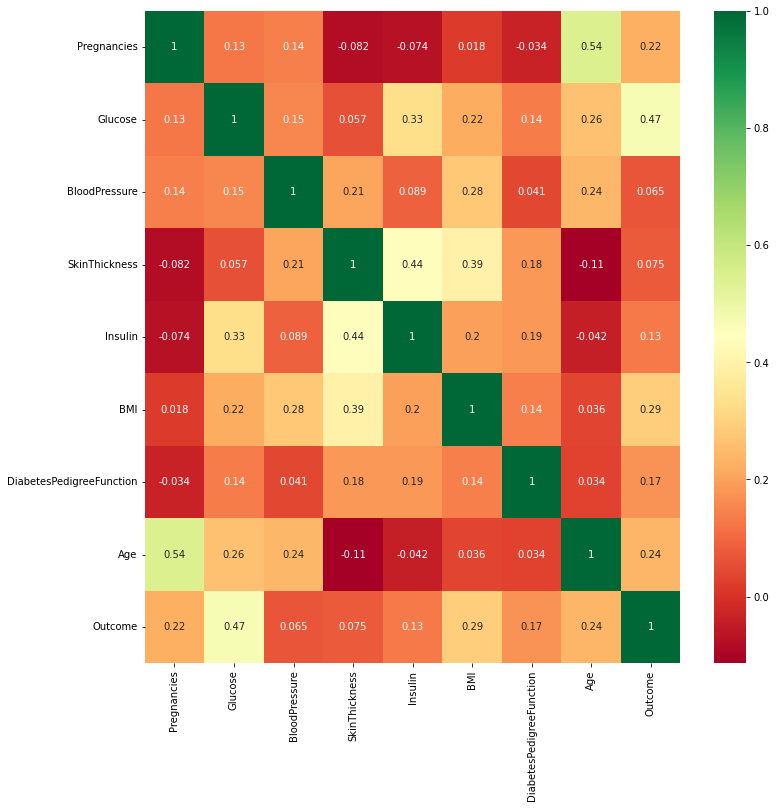

In [12]:
# Using Correlation based methods. Using graph to illustrate the result of feature selection.
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr() 
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [13]:
# Implement a regression problem with feature selection, using linear regression algorithm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


In [14]:
# Feature extraction
model = LinearRegression()
rfe = RFE(model)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)



Num Features: 4
Selected Features: [ True  True False False False  True  True False]
Feature Ranking: [1 1 3 4 5 1 1 2]


In [15]:
# Compare all feature sets with mean absolute error
from sklearn.metrics import mean_absolute_error


In [16]:
# Using all features
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('MAE using all features: ', mae)

MAE using all features:  0.3290237347917081


In [17]:
# Get the mean absolute error on the validation data
def score_dataset(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)


In [18]:
# Insulin
insulin_X_train = X_train.drop(['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age'], axis=1)
insulin_X_test = X_test.drop(['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age'], axis=1)
print("MAE from Approach 1 (Insulin):", score_dataset(insulin_X_train, insulin_X_test, y_train, y_test))
    

MAE from Approach 1 (Insulin): 0.4125891177655382


In [19]:
# Glucose
glucose_X_train = X_train.drop(['Insulin', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age'], axis=1)
glucose_X_test = X_test.drop(['Insulin', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age'], axis=1)
print("MAE from Approach 2 (Glucose):", score_dataset(glucose_X_train, glucose_X_test, y_train, y_test))


MAE from Approach 2 (Glucose): 0.3448859171651579


In [20]:
# BloodPressure
bloodpressure_X_train = X_train.drop(['Insulin', 'Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age'], axis=1)
bloodpressure_X_test = X_test.drop(['Insulin', 'Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age'], axis=1)
print("MAE from Approach 3 (BloodPressure):", score_dataset(bloodpressure_X_train, bloodpressure_X_test, y_train, y_test))


MAE from Approach 3 (BloodPressure): 0.4247635457041541


In [21]:
# SkinThickness
skinthickness_X_train = X_train.drop(['Insulin', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age'], axis=1)
skinthickness_X_test = X_test.drop(['Insulin', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age'], axis=1)
print("MAE from Approach 4 (SkinThickness):", score_dataset(skinthickness_X_train, skinthickness_X_test, y_train, y_test))


MAE from Approach 4 (SkinThickness): 0.4214170812576828


In [22]:
# BMI
bmi_X_train = X_train.drop(['Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction', 'Age'], axis=1)
bmi_X_test = X_test.drop(['Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction', 'Age'], axis=1)
print("MAE from Approach 5 (BMI):", score_dataset(bmi_X_train, bmi_X_test, y_train, y_test))

MAE from Approach 5 (BMI): 0.3912161386196146


In [23]:
# DiabetesPedigreeFunction
diabetespedigreefunction_X_train = X_train.drop(['Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Age'], axis=1)
diabetespedigreefunction_X_test = X_test.drop(['Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Age'], axis=1)
print("MAE from Approach 6 (DiabetesPedigreeFunction):", score_dataset(diabetespedigreefunction_X_train, diabetespedigreefunction_X_test, y_train, y_test))

MAE from Approach 6 (DiabetesPedigreeFunction): 0.4090519396340844


In [24]:
# Age
age_X_train = X_train.drop(['Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction'], axis=1)
age_X_test = X_test.drop(['Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction'], axis=1)
print("MAE from Approach 7 (Age):", score_dataset(age_X_train, age_X_test, y_train, y_test))

MAE from Approach 7 (Age): 0.41859950844137084
